In [15]:
import os

In [16]:
from IPython.display import Audio 

In [17]:
import numpy as np

In [18]:
import matplotlib.pyplot as plt
import tikzplotlib

In [19]:
from scipy.io import wavfile

In [20]:
rootDir = '../touchDesigner/data/generated/'

In [46]:
allFiles = os.listdir(rootDir)
for i,oneF in enumerate(allFiles):
    print(i, oneF)

0 ir_rir441_10.npy
1 ir_rir441_2.npy
2 ir_scene3_RIR_LS1_MP1_0.npy
3 ir_rir441_1.npy
4 ir_rir441_8_moreLP_woDiff.npy
5 julia.npy
6 ir_scene1_RIR_Diffuse_LS1_MP1_0.npy
7 ir_rir441_6_LP_HP_diff2_resize.npy
8 ir_scene1_RIR_Absorbing_LS1_MP1_0.npy
9 ir_rir441_5_incl_LP_HP_diff2.npy
10 ir_scene2_RIR_1mPlate_rigid_LS1_MP1_0.npy
11 ir_rir441_14.npy
12 ir_scene2_RIR_1mPlate_rigid_LS4_MP5_0.npy
13 ir_rir441_13.npy
14 ir_scene1_RIR_Rigid_LS1_MP1_0.npy
15 ir_scene3_RIR_LS1_MP1_2.npy
16 ir_rir441_11.npy
17 test.wav
18 ir_rir441_15.npy
19 ir_rir441_3.npy
20 ir_rir441_7_LP_HP_woDiff.npy
21 ir_rir441_0.npy
22 ir_rir441_9_LP3.npy
23 ir_rir441_12.npy


In [22]:
originalShoebox = '../touchDesigner/data/scenes/shoebox2/RIRs/wav/rir441.wav'

In [47]:
shoeBoxGen = os.path.join(rootDir,allFiles[18])
# shoeBoxGen = os.path.join(rootDir,"ir_rir441_6_LP_HP_diff2_resize.npy")
shoeBoxGenArr = np.load(shoeBoxGen)

In [48]:
sr,origArr = wavfile.read(originalShoebox)

In [49]:
origNorm = origArr/np.max(origArr)

In [50]:
shoeBoxNorm = shoeBoxGenArr/np.max(shoeBoxGenArr)

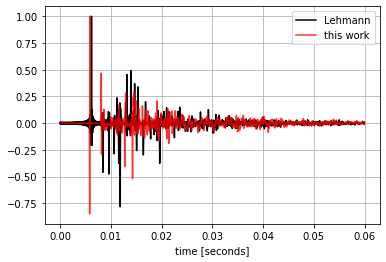

In [51]:
lim = 0.06 #seconds
nlim = int(lim*sr)

N = nlim#len(origArr)
n = np.arange(N)
t = n/sr 
plt.plot(t,origNorm[:nlim], 'k',label="Lehmann")

# N = len(shoeBoxNorm)
n = np.arange(N)
t = n/sr 
plt.plot(t,shoeBoxNorm[:nlim],'r',alpha=0.8, label = 'this work')

plt.legend(loc='upper right')

plt.xlabel('time [seconds]')
plt.grid()
fName = 'shoebox'
tikzplotlib.save("../../paper/DAFx20_Templates_LaTeX/img/"+fName+".tex", float_format='.5f')
plt.show()

In [52]:
# from matplotlib2tikz import save as tikz_save
# plt.imshow(np.array([[1,0],[-2,1]]))
# tikz_save('test.tikz')

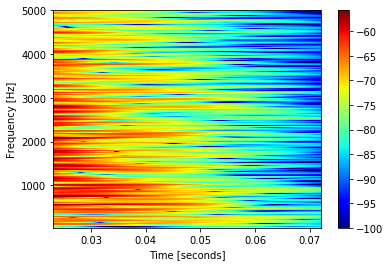

In [53]:
ha = plt.subplot(111)
plt.specgram(shoeBoxNorm[:4200],Fs=sr,NFFT=2**11,noverlap=2**11-10, vmin=-100,cmap='jet')
plt.colorbar()
plt.ylim([30,5000])
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [seconds]")
# ha.set_yscale('log')
fName = "shoeBox_sim"
tikzplotlib.save("../../paper/DAFx20_Templates_LaTeX/img/"+fName+".tex", float_format='.4f', tex_relative_path_to_data='img/',axis_width="0.8\\textwidth")
plt.show()

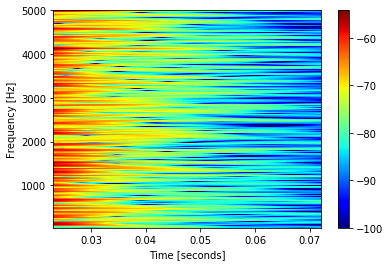

In [54]:
ha = plt.subplot(111)
plt.specgram(origNorm[:4200],Fs=sr,NFFT=2**11,noverlap=2**11-10, vmin=-100,cmap='jet')
plt.colorbar()
plt.ylim([30,5000])
# ha.set_yscale('log')
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [seconds]")
fName = "shoebox_orig"
tikzplotlib.save("../../paper/DAFx20_Templates_LaTeX/img/"+fName+".tex", float_format='.4f', tex_relative_path_to_data='img/', axis_width="0.8\\textwidth")
plt.show()

In [55]:
Audio(data=origNorm,rate=44100)

In [56]:
Audio(data=shoeBoxNorm, rate=44100)

/home/patrik/miniconda3/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


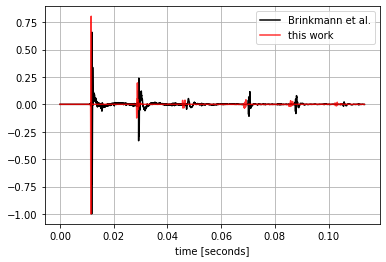

In [57]:
originalBrink = '../touchDesigner/data/scenes/03 multiple reflection (parallel finite plates)/RIRs/wav/scene3_RIR_LS1_MP1.wav'

sr,x = wavfile.read(originalBrink)

test2 = np.load(os.path.join(rootDir, "ir_scene3_RIR_LS1_MP1_2.npy"))

normTest2 = test2/np.max(abs(test2))
normBrink = x/np.max(abs(x))

N = 5000
t = np.arange(N)/sr
plt.plot(t,normBrink[:N],'k', label = "Brinkmann et al.")
plt.plot(t,normTest2[:N],'r', label="this work", alpha = 0.8)
plt.legend()
plt.grid()
plt.xlabel("time [seconds]")

fName = 'brink'
tikzplotlib.save("../../paper/DAFx20_Templates_LaTeX/img/"+fName+".tex", float_format='.5f',)

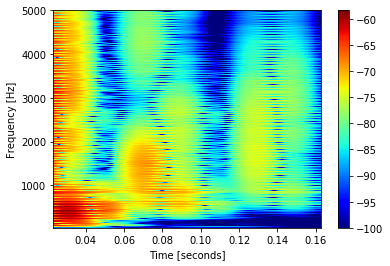

In [58]:
N = 8200
ha = plt.subplot(111)
plt.specgram(normBrink[:N],Fs=sr,NFFT=2**11,noverlap=2**11-10, vmin=-100,cmap='jet')
plt.colorbar()
plt.ylim([30,5000])
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [seconds]")
# ha.set_yscale('log')
fName = "specBrink"
tikzplotlib.save("../../paper/DAFx20_Templates_LaTeX/img/"+fName+".tex", float_format='.4f', tex_relative_path_to_data='img/',axis_width="0.8\\textwidth")
plt.show()

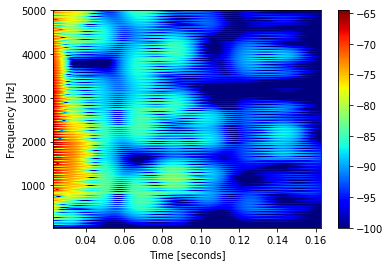

In [59]:
ha = plt.subplot(111)
plt.specgram(normTest2[:N],Fs=sr,NFFT=2**11,noverlap=2**11-10, vmin=-100,cmap='jet')
plt.colorbar()
plt.ylim([30,5000])
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [seconds]")
# ha.set_yscale('log')
fName = "simBrink"
tikzplotlib.save("../../paper/DAFx20_Templates_LaTeX/img/"+fName+".tex", float_format='.4f',tex_relative_path_to_data='img/',axis_width="0.8\\textwidth")
plt.show()

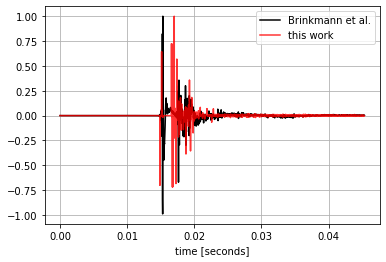

In [60]:
originalBrink = '../touchDesigner/data/scenes/01 single reflection (infinite plate)/RIRs/wav/scene1_RIR_Diffuse_LS1_MP1.wav'

sr,x = wavfile.read(originalBrink)

test2 = np.load(os.path.join(rootDir, "ir_scene1_RIR_Diffuse_LS1_MP1_0.npy"))

normTest2 = test2/np.max(abs(test2))
normBrink = x/np.max(abs(x))

N = 2000
t = np.arange(N)/sr
plt.plot(t,normBrink[:N],'k', label = "Brinkmann et al.")
plt.plot(t,normTest2[:N],'r', label="this work", alpha = 0.8)
plt.legend()
plt.grid()
plt.xlabel("time [seconds]")

fName = 'brinkDiff'
tikzplotlib.save("../../paper/DAFx20_Templates_LaTeX/img/"+fName+".tex", float_format='.5f')

In [61]:
Audio(originalBrink, rate=44100)

In [62]:
Audio(normTest2, rate=44100)

<function matplotlib.pyplot.show(*args, **kw)>

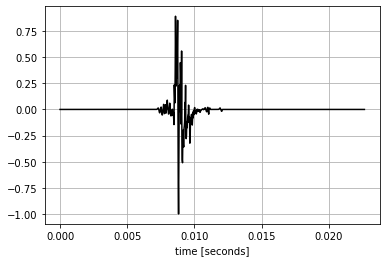

In [71]:
julia = np.load(os.path.join(rootDir, "julia.npy"))

normJulia = julia/np.max(abs(julia))
# normBrink = x/np.max(abs(x))

N = 1000
t = np.arange(N)/sr
# plt.plot(t,normBrink[:N],'k', label = "Brinkmann et al.")
plt.plot(t,normJulia[:N],'k', label="Julia set")
# plt.legend()
plt.grid()
plt.xlabel("time [seconds]")

fName = 'julia'
tikzplotlib.save("../../paper/DAFx20_Templates_LaTeX/img/"+fName+".tex", float_format='.5f', axis_width="1.5\\textwidth")
plt.show